In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import exp
import random

# PROBLEM 3 The drift diffusion model of decision-making.

In [3]:
#%% defining plot function
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 11#7.
sns.set(style = 'whitegrid',context = 'notebook', palette = 'dark')

# (a)

In [4]:
ma = 1 
mb = 0.95
x0 = 0
delta_t = 0.0001 #unit in s 
sigma = 0.5 #units in 1/s
t = 2#units in s

In [5]:
def ddm(ma, mb, x0, delta_t, sigma, t = 1000):
    
    x = np.zeros(int(t / delta_t))

    for v in range(1, len(x)):
        eta = np.random.standard_normal()
        x[v] = x[v - 1] + (ma - mb)*delta_t + sigma * eta * (delta_t**(1/2)) 
    
    return x

In [6]:
trials = pd.DataFrame()
n = 10
for i in range(n):
    x  = ddm(ma = ma, mb = mb, x0 = x0, delta_t = delta_t, sigma = sigma, t = t)

    trials['trial {}'.format(i+1)] = pd.Series(x)


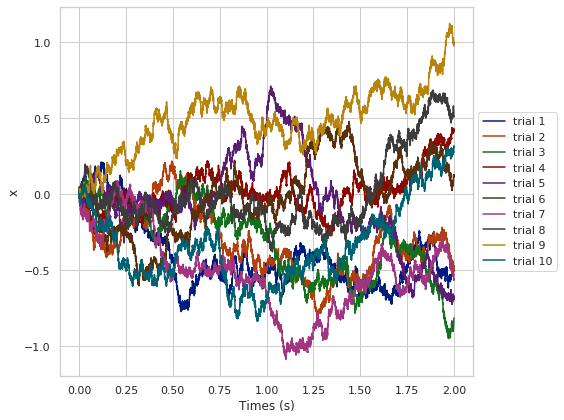

In [7]:
trials = trials.set_index(np.arange(0,t,delta_t))
trials.plot()
plt.xlabel('Times (s)')
plt.ylabel('x')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('fig11_report2.png', dpi=600)
plt.show()

# (b)

In [8]:
def rt(mu, x0, delta_t, sigma, ma = 1, mb = 0.95, me = None, rt0 = 100, trials = 1):
    
    rt_a = []
    rt_b = []
     
    for v in range(trials):
        x = x0
        t = 0
        while -mu <= x <= mu:
            eta = np.random.standard_normal()
            if me is None:
                x = x + (ma - mb)*delta_t + sigma * eta * (delta_t**(1/2))
            else:
                x = x + me*delta_t + sigma * eta * (delta_t**(1/2))
            t += 1
        
        t = t / 10 #to transform the sample into ms
        if x > mu:
            rt_a.append(t + rt0) 

        elif x < -mu:
            rt_b.append(t + rt0)
         
    return np.asarray(rt_a), np.asarray(rt_b)

In [19]:
mu = 0.5
rt_a, rt_b = rt(mu = mu, ma = ma, mb = mb, x0 = x0, 
                delta_t = delta_t, sigma = sigma, rt0 = 100, trials = 10000)

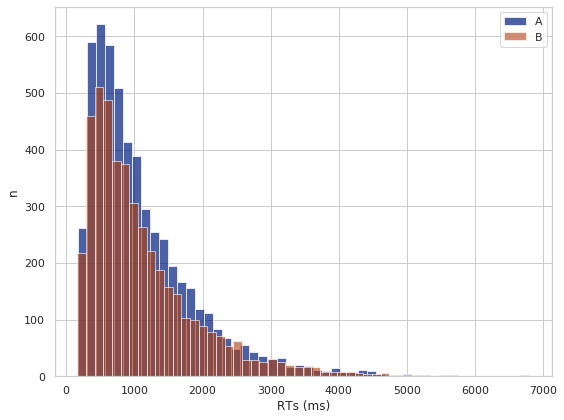

In [20]:
plt.hist(rt_a, bins = 50,alpha = 0.7)
plt.hist(rt_b, bins = 50,alpha = 0.6)
plt.legend(['A', 'B'])
plt.xlabel('RTs (ms)')
plt.ylabel('n')
plt.savefig('fig12_report2.png', dpi=600)
plt.show()

# (c)

In [11]:
mu = 0.5
me_range = np.linspace(-0.2, 0.2, 50)
beta = (2*mu)/sigma**2

IndexError: index 5 is out of bounds for axis 0 with size 5

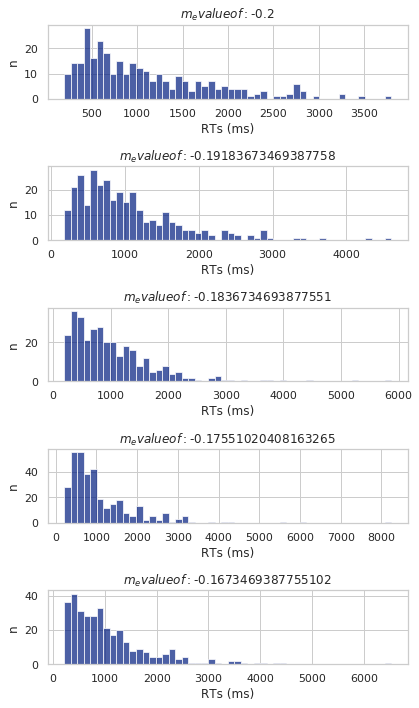

In [12]:
fig_size = [6,10]
fig, ax = plt.subplots(5, figsize = fig_size)

for i, me in enumerate(me_range):
    rt_a, rt_b = rt(mu = mu, me = me, x0 = x0, 
                delta_t = delta_t, sigma = sigma, rt0 = 100, trials = 1000)
    
    ax[i].hist(rt_a, bins = 50,alpha = 0.7)
    #ax[i].hist(rt_b, bins = 50,alpha = 0.6)
    ax[i].set_title(r'$m_e value of:${}'.format(me))
    #ax[i].legend(['A', 'B'])
    ax[i].set_xlabel('RTs (ms)')
    ax[i].set_ylabel('n')
    
# plt.legend(legend)
# plt.xlabel('RTs (ms)')
# plt.ylabel('n')

plt.show()    

In [13]:
#for i, me in enumerate(me_range):

def prob_a(mu = mu, x0 = x0, 
                delta_t = delta_t, sigma = sigma, me = 0.1 ,rt0 = 100, trials = 1000):

    rt_a, rt_b = rt(mu = mu, me = me, x0 = x0, 
                delta_t = delta_t, sigma = sigma, rt0 = rt0, trials = trials)
    a =np.sum(rt_a)
    return  a / (a + np.sum(rt_b))

prob_a = np.vectorize(prob_a)

In [14]:
def softmax(beta, me):
    return 1/(1+ exp(beta*me))

softmax = np.vectorize(softmax)

In [16]:
pA = prob_a(mu = mu, me = me_range, x0 = x0, 
                delta_t = delta_t, sigma = sigma, rt0 = 100, trials = 1000)

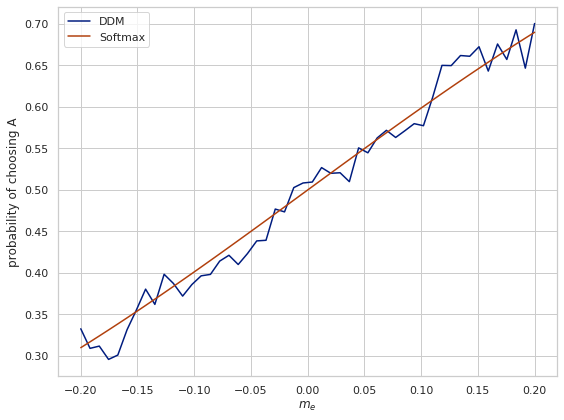

In [17]:
plt.plot(me_range,pA)
plt.xlabel(r'$m_e$')
plt.ylabel('probability of choosing A')

pB = softmax(beta, me_range)
plt.plot(me_range,1- pB)

plt.legend(['DDM', 'Softmax'])
plt.savefig('fig13_report2.png', dpi=600)
plt.show()